# CS 109A/STAT 121A/AC 209A/CSCI E-109A: 
# Midterm - 2017

**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS


- You must submit the Midterm on your own. ** No group submissions are allowed**. You may use any print or online resources but ** you may not work or consult with others**.
- Restart the kernel and run the whole notebook again before you submit. 
- Please submit both a notebook and a pdf.
 

---


## Flight Delays

The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights are published in DOT's monthly Air Travel Consumer Report and in this dataset of 2015 flight delays and cancellations.


## Data
Each entry of the flights.csv file corresponds to a flight.  More than 5,800,000 flights were recorded in 2015. These flights are described according to 31 variables. Further details of these variables can be found <a href='https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time'>here</a>, if you are interested (not needed to answer these questions). 


 

|          Name          | Type | DESCRIPTION |
|--------------------------------|---|----------------------------------------------------------------------|
| DATE                     | object | The date in python datetime format |
| MONTH                     | int64 | The month of the year(1-12) |
| DAY                       | int64 | The day of the month |
| DAY_OF_WEEK               | int64 | The day of the week(1-7, MON-SUN) |
| AIRLINE                  | object | An identifier for the airline |
| FLIGHT_NUMBER             | int64 | The flight number |
| TAIL_NUMBER              | object | The tail number (aircraft) corresponding to this flight |
| ORIGIN_AIRPORT           | object | The code for origin airport |
| DESTINATION_AIRPORT      | object | The code for destination airport |
| SCHED_DEP                | object | The departure time in python datetime.time format |
| SCHED_ARR                | object | The arrival time in python datetime.time format |
| DEPARTURE_DELAY         |  float64| The delay incurred at the origin  (mins) |
| ARRIVAL_DELAY           | float64 | The delay when the flight reached the (mins) destination |
| DISTANCE                  | int64 | Distance in miles between origin and destination |
| SCHEDULED_TIME          | float64 | Scheduled time of flight (minutes) |
| ELAPSED_TIME            | float64 | Actual time of flight (minutes) |
| AIR_SYSTEM_DELAY        | float64 | What part of the delay was NASD?(mins) |
| SECURITY_DELAY          | float64 | What part of the delay was due to security problems? (mins) |
| AIRLINE_DELAY           | float64 | What part of the delay is due to the airline? (mins) |
| LATE_AIRCRAFT_DELAY     | float64 | What part of the delay is due to previous flight(s) being late(mins) |
| WEATHER_DELAY           | float64 | Delay due to extreme weather events(min) |

You can read more about the various weather delays [here](https://www.rita.dot.gov/bts/help/aviation/html/understanding.html) if you are so inclined.



## Data/Caveats

The data file, flights.csv, is found <a href="https://drive.google.com/file/d/0B9dVesTppCgHY0IwZHk3SGhjd00/view?usp=sharing">here</a> (note, it is about 70MB). 

This data is already preprocessed, reduced, partially cleaned and therefore not identical to the original dataset.

## Problem Description

We will build two separate models: one model that classifies whether a flight will be delayed and a second model that predicts the length of delay given that a flight is truly delayed. Only consider models taught in class so far. 

** Consider the following: **
This is a large dataset; think of strategies on how to solve this problem. Create a manageable subsample of the data that you can use to train and test/validate, but eventually you should predict on all the data (excluding the training set).

### Questions
1. (5pts) Create a new variable, `DELAY_OR_NOT`: a boolean/indicator variable which indicates any arrival delay under 15 mins as a 0, and any delay at or above 15 mins as a 1 (`ARRIVAL_DELAY >= 15`).
2. (5pts) Make sure you understand the data variable descriptions before you start the analysis. Consider all the columns and determine and list which of these predictors should not be used. 
3. (15pts) Perform EDA to gain intuition of the factors that affect delay and provide visuals: do delays vary across airlines, or time of departure, or airport (do, at the very least, Chicago (ORD), Boston (BOS), and your favorite another airport), or airport traffic?
4. (20pts) Build a classification model that classifies delays according to `DELAY_OR_NOT`. This is an unbalanced dataset, thus consider the appropriate performance metric when reporting your results. 
5. (5pts) Given your model, comment on the importance of factors as related to whether a flight is delayed.
6. (5pts) Evaluate your model(s) on your test set, and finally provide a visual to show which airlines are predicted to have the most delays using all the data excluding the training and test set. 
7. (15pts) Build a regression model that predicts the length of delay (on the log scale) given that a flight is truly delayed.
8. (20pts) Write a report (in the last markdown cell in your notebook with your findings (without code)). Describe the main design decisions you have made with justifications. Clearly explain your methodology and results. This should not be more than 300 words. You may use up to 5 diagrams.

In [15]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import discriminant_analysis
from datetime import datetime
from sklearn.linear_model import LinearRegression

In [25]:
dataframe = pd.read_csv("cs109a_midterm.csv")

In [26]:
df = dataframe.copy()
df.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-09-19,9,19,6,AA,394,N3FMAA,ORD,LGA,07:15:00,...,9.0,1.0,733,135.0,127.0,NaN,NaN,NaN,NaN,NaN
1,2015-10-28,10,28,3,AA,375,N4YDAA,11298,13342,20:15:00,...,0.0,-31.0,853,149.0,118.0,NaN,NaN,NaN,NaN,NaN
2,2015-08-19,8,19,3,MQ,3648,N512MQ,XNA,ORD,12:22:00,...,-1.0,-21.0,522,108.0,88.0,NaN,NaN,NaN,NaN,NaN
3,2015-12-01,12,1,2,WN,4096,N912WN,PHX,BWI,11:20:00,...,11.0,-14.0,1999,260.0,235.0,NaN,NaN,NaN,NaN,NaN
4,2015-09-15,9,15,2,WN,285,N7718B,MCI,DEN,14:10:00,...,-4.0,-12.0,533,105.0,97.0,NaN,NaN,NaN,NaN,NaN


In [27]:
df.shape

(804941, 21)

In [28]:
# create indicator for arrival delay at or above 15 mins
df['DELAY_OR_NOT']=(df['ARRIVAL_DELAY']>=15)*1

In [29]:
df.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAY_OR_NOT
0,2015-09-19,9,19,6,AA,394,N3FMAA,ORD,LGA,07:15:00,...,1.0,733,135.0,127.0,NaN,NaN,NaN,NaN,NaN,0
1,2015-10-28,10,28,3,AA,375,N4YDAA,11298,13342,20:15:00,...,-31.0,853,149.0,118.0,NaN,NaN,NaN,NaN,NaN,0
2,2015-08-19,8,19,3,MQ,3648,N512MQ,XNA,ORD,12:22:00,...,-21.0,522,108.0,88.0,NaN,NaN,NaN,NaN,NaN,0
3,2015-12-01,12,1,2,WN,4096,N912WN,PHX,BWI,11:20:00,...,-14.0,1999,260.0,235.0,NaN,NaN,NaN,NaN,NaN,0
4,2015-09-15,9,15,2,WN,285,N7718B,MCI,DEN,14:10:00,...,-12.0,533,105.0,97.0,NaN,NaN,NaN,NaN,NaN,0


In [30]:
print("Unique flight numbers: ", df['FLIGHT_NUMBER'].unique().size)
print("Unique tail numbers: ", df['TAIL_NUMBER'].unique().size)

Unique flight numbers:  6754
Unique tail numbers:  4819


Question 2: (5pts) Make sure you understand the data variable descriptions before you start the analysis. Consider all the columns and determine and list which of these predictors should not be used.

DEPARTURE_DELAY, ELAPSED_TIME, AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, and WEATHER_DELAY should not be used. We are trying to determine whether a flight will be delayed, and if so, how long it will be delayed, so we are limited to the data that can be collected before the plane takes off.

We also won't use DATE because the same information is encoded in the MONTH and DAY predictors. And finally, we won't use FLIGHT_NUMBER or TAIL_NUMBER because they are categorical variables with too many categories. It's not worth it to add 10,000 binary predictors just in case one particular flight pattern or aircraft is extremely influential on whether or not a flight is delayed.

In [39]:
# proportion of flights delayed by airline
delayed_prop = {}
delayed_prop['airline'] = df.groupby(['AIRLINE'])['DELAY_OR_NOT'].sum()/df.groupby(['AIRLINE'])['DELAY_OR_NOT'].count()
delayed_prop['airline']

AIRLINE
AA    0.089197
AS    0.038682
B6    0.159416
DL    0.044268
EV    0.117014
F9    0.226847
HA    0.033147
MQ    0.136061
NK    0.372764
OO    0.088212
UA    0.134035
US    0.103044
VX    0.123715
WN    0.109512
Name: DELAY_OR_NOT, dtype: float64

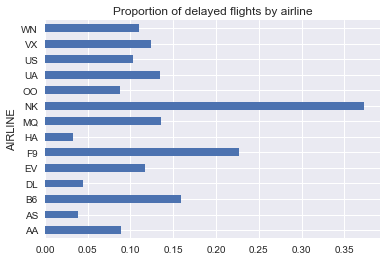

In [40]:
delayed_prop['airline'].plot(kind="barh", title="Proportion of delayed flights by airline")

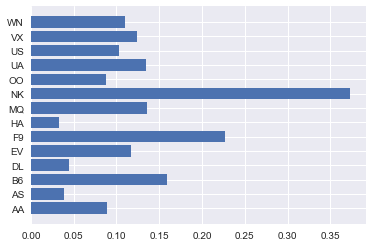

In [41]:
# can make this prettier later using code below
airlines = delayed_prop['airline'].index
nums = np.arange(len(airlines))
plt.barh(nums, delayed_prop['airline'].values)
ticks = plt.yticks(nums,airlines)

In [42]:
'''
# code from hw1-submission

# count how frequently which artist comes up
artist_frequency = flatframe['band_singer'].value_counts()

# only show artists who appear at least 15 times or more
top_artist_frequency = artist_frequency[artist_frequency > 14]

# plot a bar chart with the frequency an artist is in the top 100
sns.reset_defaults()
plt.figure(figsize=(5,4))
ax = plt.gca()
# store collected values in new lists, for plotting
artists = top_artist_frequency.index
freq = top_artist_frequency.values
nums = np.arange(len(top_artist_frequency))
plt.barh(nums, freq)
# annotate bars with frequency
for p, c, ch in zip(nums, artists, freq):
    plt.annotate(str(ch), xy=(ch + 0.25, p), va = 'center')
# editing ticks
ticks = plt.yticks(nums, artists)
xt = plt.xticks()[0]
plt.xticks(xt, [' '] * len(xt))
plt.grid(axis = 'x', color ='white', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
# invert y-axis
plt.gca().invert_yaxis()
# remove all axes
sns.despine(left=True, bottom=True)
'''

"\n# code from hw1-submission\n\n# count how frequently which artist comes up\nartist_frequency = flatframe['band_singer'].value_counts()\n\n# only show artists who appear at least 15 times or more\ntop_artist_frequency = artist_frequency[artist_frequency > 14]\n\n# plot a bar chart with the frequency an artist is in the top 100\nsns.reset_defaults()\nplt.figure(figsize=(5,4))\nax = plt.gca()\n# store collected values in new lists, for plotting\nartists = top_artist_frequency.index\nfreq = top_artist_frequency.values\nnums = np.arange(len(top_artist_frequency))\nplt.barh(nums, freq)\n# annotate bars with frequency\nfor p, c, ch in zip(nums, artists, freq):\n    plt.annotate(str(ch), xy=(ch + 0.25, p), va = 'center')\n# editing ticks\nticks = plt.yticks(nums, artists)\nxt = plt.xticks()[0]\nplt.xticks(xt, [' '] * len(xt))\nplt.grid(axis = 'x', color ='white', linestyle='-')\nax.tick_params(axis='both', which='both',length=0)\n# invert y-axis\nplt.gca().invert_yaxis()\n# remove all axes\

In [43]:
'''
#hw3 solutions
def plot_relevant_question(dataframe, ax, labels_to_use, criteria_label, criteria, boolean_query=True):
    df = dataframe.copy()
    
    if boolean_query:
        df['column_of_interest'] = df[criteria_label].isin(criteria)
        for g, group in df.groupby('column_of_interest'):
            group['count'].plot(kind='hist', ax=ax, alpha=0.3, label = labels_to_use[g])
        ax.legend(loc='best')
        
    else:
        for i, (g, group) in enumerate(df.groupby(criteria_label)):
            group['count'].plot(kind='hist', ax=ax[i], bins=10, alpha=0.3, label = labels_to_use[i])
            ax[i].set_title(labels_to_use[i])
            ax[i].set_xlim(0,9000)

fig, ax = plt.subplots(1,2,figsize=(15,5))
plot_relevant_question(df, ax[0], )
'''

"\n#hw3 solutions\ndef plot_relevant_question(dataframe, ax, labels_to_use, criteria_label, criteria, boolean_query=True):\n    df = dataframe.copy()\n    \n    if boolean_query:\n        df['column_of_interest'] = df[criteria_label].isin(criteria)\n        for g, group in df.groupby('column_of_interest'):\n            group['count'].plot(kind='hist', ax=ax, alpha=0.3, label = labels_to_use[g])\n        ax.legend(loc='best')\n        \n    else:\n        for i, (g, group) in enumerate(df.groupby(criteria_label)):\n            group['count'].plot(kind='hist', ax=ax[i], bins=10, alpha=0.3, label = labels_to_use[i])\n            ax[i].set_title(labels_to_use[i])\n            ax[i].set_xlim(0,9000)\n\nfig, ax = plt.subplots(1,2,figsize=(15,5))\nplot_relevant_question(df, ax[0], )\n"

In [44]:
# top 50 airports by number of flights originating from there
topairport = df['ORIGIN_AIRPORT'].value_counts()[:50].index

delayed_prop['origin_airport'] = df.groupby(['ORIGIN_AIRPORT'])['DELAY_OR_NOT'].sum()/df.groupby(['ORIGIN_AIRPORT'])['DELAY_OR_NOT'].count()
delayed_prop['top_origin_airport'] = delayed_prop['origin_airport'][topairport]

In [45]:
delayed_prop['dest_airport'] = df.groupby(['DESTINATION_AIRPORT'])['DELAY_OR_NOT'].sum()/df.groupby(['DESTINATION_AIRPORT'])['DELAY_OR_NOT'].count()
delayed_prop['top_dest_airport'] = delayed_prop['dest_airport'][topairport]

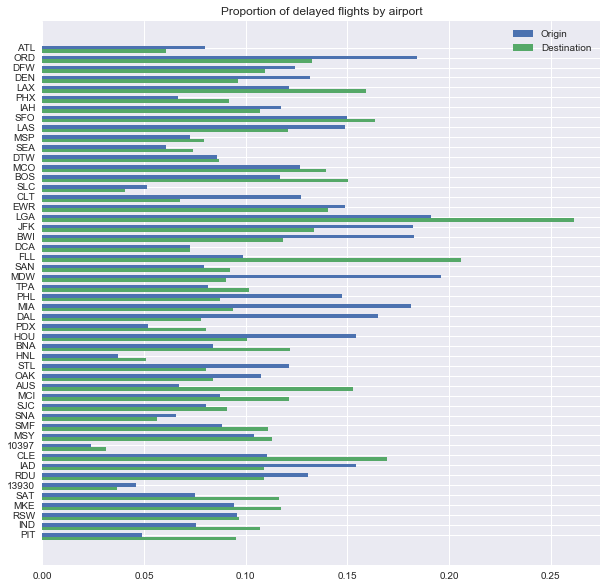

In [46]:
width = 0.35
fig, ax = plt.subplots(figsize=(10,10))
nums = np.arange(len(topairport))
ax.barh(nums, delayed_prop['top_origin_airport'].values, width, label = "Origin")
ax.barh(nums+width, delayed_prop['top_dest_airport'].values, width, label = "Destination")
ticks = plt.yticks(nums,topairport)
ax.set_title("Proportion of delayed flights by airport")
ax.legend(loc='best')
plt.gca().invert_yaxis()

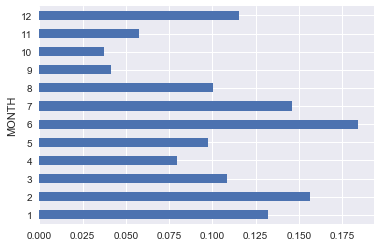

In [47]:
delayed_prop['month'] = df.groupby(['MONTH'])['DELAY_OR_NOT'].sum()/df.groupby(['MONTH'])['DELAY_OR_NOT'].count()
delayed_prop['month'].plot(kind="barh")

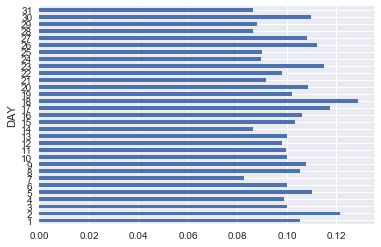

In [48]:
delayed_prop['day'] = df.groupby(['DAY'])['DELAY_OR_NOT'].sum()/df.groupby(['DAY'])['DELAY_OR_NOT'].count()
delayed_prop['day'].plot(kind="barh")

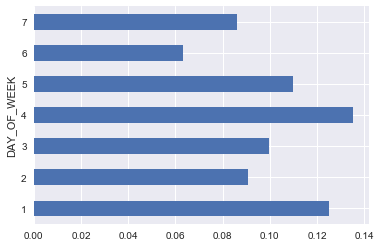

In [49]:
#change to weekend vs weekday?
delayed_prop['week'] = df.groupby(['DAY_OF_WEEK'])['DELAY_OR_NOT'].sum()/df.groupby(['DAY_OF_WEEK'])['DELAY_OR_NOT'].count()
delayed_prop['week'].plot(kind="barh")

In [50]:
df["DATE"] = df["DATE"].astype("datetime64[ns]")

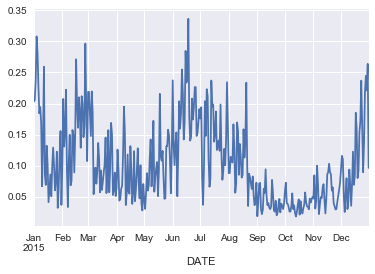

In [51]:
# proportion of delayed flights by date
delayed_prop['date'] = df.groupby(['DATE'])['DELAY_OR_NOT'].sum()/df.groupby(['DATE'])['DELAY_OR_NOT'].count()
delayed_prop['date'].plot()

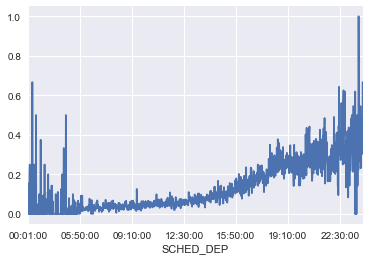

In [52]:
# switch to dif kind of graph?
delayed_prop['sched_dep'] = df.groupby(['SCHED_DEP'])['DELAY_OR_NOT'].sum()/df.groupby(['SCHED_DEP'])['DELAY_OR_NOT'].count()
delayed_prop['sched_dep'].plot()

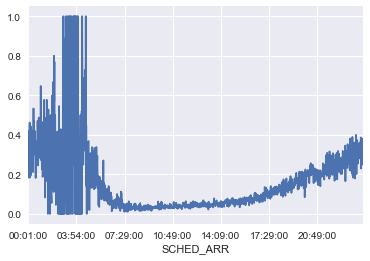

In [53]:
# dif kind of graph?
delayed_prop['sched_dep'] = df.groupby(['SCHED_ARR'])['DELAY_OR_NOT'].sum()/df.groupby(['SCHED_ARR'])['DELAY_OR_NOT'].count()
delayed_prop['sched_dep'].plot()

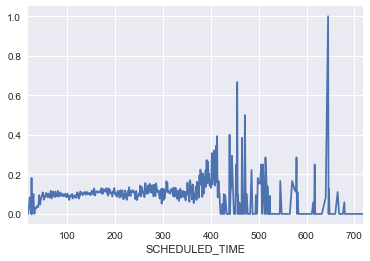

In [54]:
# flat at 0 bc no info. is this useful? delete? switch to histogram?
delayed_prop['sched_dep'] = df.groupby(['SCHEDULED_TIME'])['DELAY_OR_NOT'].sum()/df.groupby(['SCHEDULED_TIME'])['DELAY_OR_NOT'].count()
delayed_prop['sched_dep'].plot()

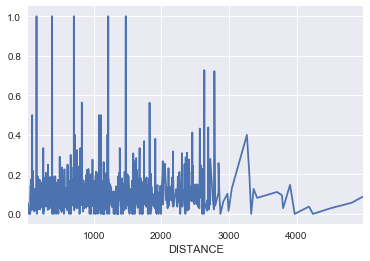

In [55]:
#switch to hist?
delayed_prop['dist'] = df.groupby(['DISTANCE'])['DELAY_OR_NOT'].sum()/df.groupby(['DISTANCE'])['DELAY_OR_NOT'].count()
delayed_prop['dist'].plot()

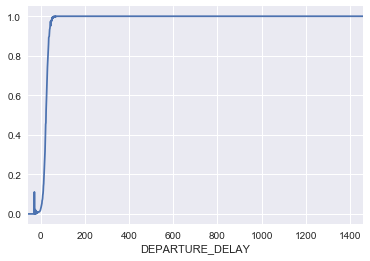

In [56]:
#if leave late, likely to arrive late too
delayed_prop['dep_delay'] = df.groupby(['DEPARTURE_DELAY'])['DELAY_OR_NOT'].sum()/df.groupby(['DEPARTURE_DELAY'])['DELAY_OR_NOT'].count()
delayed_prop['dep_delay'].plot()

Question 3: (15pts) 

Perform EDA to gain intuition of the factors that affect delay and provide visuals: do delays vary across airlines, or time of departure, or airport (do, at the very least, Chicago (ORD), Boston (BOS), and your favorite another airport), or airport traffic?

In [34]:
# drop non-predictors
df_pred = df.copy()
resps = ['ARRIVAL_DELAY', 'DEPARTURE_DELAY', 'ELAPSED_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
tedious_preds = ['DATE', 'FLIGHT_NUMBER', 'TAIL_NUMBER']
non_preds = resps+tedious_preds
for non_pred in non_preds:
    df_pred = df_pred.drop(non_pred, axis=1)
df_pred.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,SCHED_ARR,DISTANCE,SCHEDULED_TIME,DELAY_OR_NOT
0,9,19,6,AA,ORD,LGA,07:15:00,10:30:00,733,135.0,0
1,10,28,3,AA,11298,13342,20:15:00,22:44:00,853,149.0,0
2,8,19,3,MQ,XNA,ORD,12:22:00,14:10:00,522,108.0,0
3,12,1,2,WN,PHX,BWI,11:20:00,17:40:00,1999,260.0,0
4,9,15,2,WN,MCI,DEN,14:10:00,14:55:00,533,105.0,0


In [35]:
print("Unique airports: ", df['ORIGIN_AIRPORT'].unique().size)

Unique airports:  628


There are too many unique airports, so let's keep the 50 airports with the highest numbers of flights originating from there, and convert all of the other airports to "Other".

In [57]:
# subset non-top airports into other
def other_airport(airport):
    if airport in list(topairport.values):
        return airport
    else:
        return "Other"

df_pred['ORIGIN_AIRPORT'] = df_pred['ORIGIN_AIRPORT'].apply(other_airport)
df_pred['DESTINATION_AIRPORT'] = df_pred['DESTINATION_AIRPORT'].apply(other_airport)
df_pred.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,SCHED_ARR,DISTANCE,SCHEDULED_TIME,DELAY_OR_NOT
0,9,19,6,AA,ORD,LGA,07:15:00,10:30:00,733,135.0,0
1,10,28,3,AA,Other,Other,20:15:00,22:44:00,853,149.0,0
2,8,19,3,MQ,Other,ORD,12:22:00,14:10:00,522,108.0,0
3,12,1,2,WN,PHX,BWI,11:20:00,17:40:00,1999,260.0,0
4,9,15,2,WN,MCI,DEN,14:10:00,14:55:00,533,105.0,0


Encode time as hours because like months in bike rental pset, hour 24 is close to hour 1?

In [148]:
# convert times to hours
def time_to_hr(hhmmss):
    [hours, minutes, seconds] = [int(x) for x in hhmmss.split(':')]
    return hours

df_pred['SCHED_DEP'] = df_pred['SCHED_DEP'].apply(time_to_hr)
df_pred['SCHED_ARR'] = df_pred['SCHED_ARR'].apply(time_to_hr)
df_pred.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,SCHED_ARR,DISTANCE,SCHEDULED_TIME,DELAY_OR_NOT
0,9,19,6,AA,ORD,LGA,7,10,733,135.0,0
1,10,28,3,AA,Other,Other,20,22,853,149.0,0
2,8,19,3,MQ,Other,ORD,12,14,522,108.0,0
3,12,1,2,WN,PHX,BWI,11,17,1999,260.0,0
4,9,15,2,WN,MCI,DEN,14,14,533,105.0,0


In [149]:
# one-hot encode categorical predictors
maybe_cat = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'SCHED_DEP', 'SCHED_ARR']
categorical = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
df_dum = pd.get_dummies(df_pred, columns=categorical+maybe_cat, drop_first=True)
df_dum.head()

,DISTANCE,SCHEDULED_TIME,DELAY_OR_NOT,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,...,SCHED_ARR_14,SCHED_ARR_15,SCHED_ARR_16,SCHED_ARR_17,SCHED_ARR_18,SCHED_ARR_19,SCHED_ARR_20,SCHED_ARR_21,SCHED_ARR_22,SCHED_ARR_23
0,733,135.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,853,149.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,522,108.0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,1999,260.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,533,105.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [150]:
# split data into train and test
np.random.seed(9001)
msk = np.random.rand(len(df)) < 0.5
data_train = df_dum[msk]
data_test = df_dum[~msk]

In [151]:
# extract matrices from dataframe
dtrain_X = data_train.drop('DELAY_OR_NOT', axis=1)
dtest_X = data_test.drop('DELAY_OR_NOT', axis=1)

Xtrain = dtrain_X.values
Xtest = dtest_X.values
ytrain = data_train['DELAY_OR_NOT'].values
ytest = data_test['DELAY_OR_NOT'].values

In [152]:
'''
# continue working on this?
#hw3 solutions

predictors = set(dtrain_X.columns)
selected_predictors = set()

n = data_train.shape[0]
best_bic = np.inf

best_bics = []
best_models = []

X = np.ones(n).reshape(-1,1)
X = np.concatenate([X, data_train[list(selected_predictors)].values], axis=1)
while (True):
    possible_bic_scores = []
    possible_predictors = list(selected_predictors ^ predictors)
    
    if len(possible_predictors) == 0:
        break
    
    for predictor in possible_predictors:
        x_temp = np.concatenate([X, data_train[predictor].values.reshape(-1,1)], axis=1)
        
'''

'\n# continue working on this?\n#hw3 solutions\n\npredictors = set(dtrain_X.columns)\nselected_predictors = set()\n\nn = data_train.shape[0]\nbest_bic = np.inf\n\nbest_bics = []\nbest_models = []\n\nX = np.ones(n).reshape(-1,1)\nX = np.concatenate([X, data_train[list(selected_predictors)].values], axis=1)\nwhile (True):\n    possible_bic_scores = []\n    possible_predictors = list(selected_predictors ^ predictors)\n    \n    if len(possible_predictors) == 0:\n        break\n    \n    for predictor in possible_predictors:\n        x_temp = np.concatenate([X, data_train[predictor].values.reshape(-1,1)], axis=1)\n        \n'

In [153]:
# C=0.01
# fit logistic regression models
classif = {}
classif['logit_ovr'] = LogisticRegression(penalty='l1', C=0.01, random_state=9001, multi_class='ovr')
classif['logit_ovr'].fit(Xtrain, ytrain)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=9001, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [154]:
classif['logit_ovr_train'] = classif['logit_ovr'].predict(Xtrain)
print("Confusion matrix: \n", confusion_matrix(ytrain, classif['logit_ovr_train']))
print("AUC score: ", metrics.roc_auc_score(ytrain, classif['logit_ovr_train']))

Confusion matrix: 
 [[358556   2762]
 [ 33923   7055]]
AUC score:  0.582260658211


In [155]:
classif['logit_ovr_test'] = classif['logit_ovr'].predict(Xtest)
print("Confusion matrix: \n", confusion_matrix(ytest, classif['logit_ovr_test']))
print("AUC score: ", metrics.roc_auc_score(ytest, classif['logit_ovr_test']))

Confusion matrix: 
 [[358658   2858]
 [ 34003   7126]]
AUC score:  0.582677073097


In [156]:
ovr_coeffs = pd.DataFrame(dict(feature=list(dtrain_X.columns), l1=classif['logit_ovr'].coef_.flatten()))
ovr_coeffs_test = ovr_coeffs.drop(ovr_coeffs[ovr_coeffs.l1 == 0].index)
ovr_coeffs_test

,feature,l1
0,DISTANCE,0.000238
1,SCHEDULED_TIME,-0.001829
2,AIRLINE_AS,-0.985178
3,AIRLINE_B6,0.476417
4,AIRLINE_DL,-1.026262
5,AIRLINE_EV,0.405942
6,AIRLINE_F9,1.004731
7,AIRLINE_HA,-0.600419
8,AIRLINE_MQ,0.335655
9,AIRLINE_NK,1.808873


In [157]:
# C=0.001
classif = {}
classif['logit_ovr'] = LogisticRegression(penalty='l1', C=0.001, random_state=9001, multi_class='ovr')
classif['logit_ovr'].fit(Xtrain, ytrain)
classif['logit_ovr_train'] = classif['logit_ovr'].predict(Xtrain)
print("Confusion matrix: \n", confusion_matrix(ytrain, classif['logit_ovr_train']))
print("AUC score: ", metrics.roc_auc_score(ytrain, classif['logit_ovr_train']))
classif['logit_ovr_test'] = classif['logit_ovr'].predict(Xtest)
print("Confusion matrix: \n", confusion_matrix(ytest, classif['logit_ovr_test']))
print("AUC score: ", metrics.roc_auc_score(ytest, classif['logit_ovr_test']))
ovr_coeffs = pd.DataFrame(dict(feature=list(dtrain_X.columns), l1=classif['logit_ovr'].coef_.flatten()))
ovr_coeffs_test = ovr_coeffs.drop(ovr_coeffs[ovr_coeffs.l1 == 0].index)
ovr_coeffs_test

Confusion matrix: 
 [[361310      8]
 [ 40911     67]]
AUC score:  0.500806441255
Confusion matrix: 
 [[361496     20]
 [ 41064     65]]
AUC score:  0.500762535405


,feature,l1
0,DISTANCE,0.000183
1,SCHEDULED_TIME,-0.001485
2,AIRLINE_AS,-0.067181
4,AIRLINE_DL,-0.787803
9,AIRLINE_NK,0.618103
47,ORIGIN_AIRPORT_ORD,0.066948
48,ORIGIN_AIRPORT_Other,-0.237859
98,DESTINATION_AIRPORT_Other,-0.111588
115,MONTH_2,0.087015
117,MONTH_4,-0.051705


In [ ]:
# this scoring thing doesn't really seem to work
# did this return something???
# fit logistic regression models
'''
classif = {}
classif['logit_ovr'] = LogisticRegressionCV(penalty='l1', random_state=9001, multi_class='ovr', solver='liblinear', scoring='auc')
classif['logit_ovr'].fit(Xtrain, ytrain)
'''

In [ ]:
'''
classif['logit_ovr_train'] = classif['logit_ovr'].predict(Xtrain)
print("Confusion matrix: \n", confusion_matrix(ytrain, classif['logit_ovr_train']))
print("AUC score: ", metrics.roc_auc_score(ytrain, classif['logit_ovr_train']))
classif['logit_ovr_test'] = classif['logit_ovr'].predict(Xtest)
print("Confusion matrix: \n", confusion_matrix(ytest, classif['logit_ovr_test']))
print("AUC score: ", metrics.roc_auc_score(ytest, classif['logit_ovr_test']))
ovr_coeffs = pd.DataFrame(dict(feature=list(dtrain_X.columns), l1=classif['logit_ovr'].coef_.flatten()))
ovr_coeffs_test = ovr_coeffs.drop(ovr_coeffs[ovr_coeffs.l1 == 0].index)
ovr_coeffs_test
'''

4. (20pts) Build a classification model that classifies delays according to `DELAY_OR_NOT`. This is an unbalanced dataset, thus consider the appropriate performance metric when reporting your results. 

Unbalanced dataset, so don't use accuracy_score, use AUC instead.

If AUC not high enough, try PCA. But then will be difficult to explain importance of factors.

HW6 for AUC calculation

4 dif classification models
1. logistic regression
2. kNN
3. LDA/QDA
4. classification trees

In [117]:
dfd = dataframe.copy()
dfd = dfd[dfd['ARRIVAL_DELAY']>=15]
dfd = dfd.reset_index(drop=True)
dfd.head()

,DATE,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,...,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-01-04,1,4,7,WN,958,N211WN,PHL,ATL,18:35:00,...,121.0,132.0,666,135.0,146.0,11.0,0.0,20.0,101.0,0.0
1,2015-07-22,7,22,3,EV,2682,N678AE,BRO,DFW,17:33:00,...,112.0,98.0,482,107.0,93.0,0.0,0.0,0.0,98.0,0.0
2,2015-03-23,3,23,1,OO,4629,N554CA,LAS,SEA,18:15:00,...,134.0,128.0,867,167.0,161.0,0.0,0.0,0.0,128.0,0.0
3,2015-03-12,3,12,4,US,2146,N951UW,LGA,BOS,14:00:00,...,-5.0,38.0,184,63.0,106.0,38.0,0.0,0.0,0.0,0.0
4,2015-04-27,4,27,1,EV,2557,N673AE,SHV,DFW,16:41:00,...,140.0,148.0,190,64.0,72.0,8.0,0.0,95.0,45.0,0.0


In [132]:
# drop non-predictors
dfd_pred = dfd.copy()
non_preds = ['DEPARTURE_DELAY','DATE', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ELAPSED_TIME', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
for non_pred in non_preds:
    dfd_pred = dfd_pred.drop(non_pred, axis=1)

dfd_pred.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,SCHED_ARR,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME
0,1,4,7,WN,PHL,ATL,18:35:00,20:50:00,132.0,666,135.0
1,7,22,3,EV,BRO,DFW,17:33:00,19:20:00,98.0,482,107.0
2,3,23,1,OO,LAS,SEA,18:15:00,21:02:00,128.0,867,167.0
3,3,12,4,US,LGA,BOS,14:00:00,15:03:00,38.0,184,63.0
4,4,27,1,EV,SHV,DFW,16:41:00,17:45:00,148.0,190,64.0


In [133]:
# subset non-top airports into other
dfd_pred['ORIGIN_AIRPORT'] = dfd_pred['ORIGIN_AIRPORT'].apply(other_airport)
dfd_pred['DESTINATION_AIRPORT'] = dfd_pred['DESTINATION_AIRPORT'].apply(other_airport)
dfd_pred.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,SCHED_ARR,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME
0,1,4,7,WN,PHL,ATL,18:35:00,20:50:00,132.0,666,135.0
1,7,22,3,EV,Other,DFW,17:33:00,19:20:00,98.0,482,107.0
2,3,23,1,OO,LAS,SEA,18:15:00,21:02:00,128.0,867,167.0
3,3,12,4,US,LGA,BOS,14:00:00,15:03:00,38.0,184,63.0
4,4,27,1,EV,Other,DFW,16:41:00,17:45:00,148.0,190,64.0


In [134]:
# convert time to hours
dfd_pred['SCHED_DEP'] = dfd_pred['SCHED_DEP'].apply(time_to_hr)
dfd_pred['SCHED_ARR'] = dfd_pred['SCHED_ARR'].apply(time_to_hr)

# convert arrival_delay to logarithmic scale
dfd_pred['ARRIVAL_DELAY'] = dfd_pred['ARRIVAL_DELAY'].apply(math.log)
dfd_pred.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHED_DEP,SCHED_ARR,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME
0,1,4,7,WN,PHL,ATL,18,20,4.882802,666,135.0
1,7,22,3,EV,Other,DFW,17,19,4.584967,482,107.0
2,3,23,1,OO,LAS,SEA,18,21,4.852030,867,167.0
3,3,12,4,US,LGA,BOS,14,15,3.637586,184,63.0
4,4,27,1,EV,Other,DFW,16,17,4.997212,190,64.0


In [135]:
# one-hot encode categorical predictors
cats = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHED_DEP', 'SCHED_ARR']
dfd_dum = pd.get_dummies(dfd_pred, columns=cats, drop_first=True)
dfd_dum.head()

,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,...,SCHED_ARR_14,SCHED_ARR_15,SCHED_ARR_16,SCHED_ARR_17,SCHED_ARR_18,SCHED_ARR_19,SCHED_ARR_20,SCHED_ARR_21,SCHED_ARR_22,SCHED_ARR_23
0,4.882802,666,135.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,4.584967,482,107.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,4.852030,867,167.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3.637586,184,63.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4.997212,190,64.0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [136]:
# split data into train and test
np.random.seed(9001)
msk = np.random.rand(len(df_delay_dum)) < 0.5
dfd_train = dfd_dum[msk]
dfd_test = dfd_dum[~msk]

In [137]:
dfd_train.head()

,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,...,SCHED_ARR_14,SCHED_ARR_15,SCHED_ARR_16,SCHED_ARR_17,SCHED_ARR_18,SCHED_ARR_19,SCHED_ARR_20,SCHED_ARR_21,SCHED_ARR_22,SCHED_ARR_23
0,4.882802,666,135.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,2.890372,654,128.0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
9,3.496508,777,145.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
12,3.761200,301,89.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
13,3.178054,862,135.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [138]:
# extract matrices from dataframe
dfdtrain_X = dfd_train.drop('ARRIVAL_DELAY', axis=1)
dfdtest_X = dfd_test.drop('ARRIVAL_DELAY', axis=1)

dfd = {}
dfd['Xtrain'] = dfdtrain_X.values
dfd['Xtest'] = dfdtest_X.values
dfd['ytrain'] = dfd_train['ARRIVAL_DELAY'].values
dfd['ytest'] = dfd_test['ARRIVAL_DELAY'].values

In [139]:
dfdtrain_X.head()

,DISTANCE,SCHEDULED_TIME,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,...,SCHED_ARR_14,SCHED_ARR_15,SCHED_ARR_16,SCHED_ARR_17,SCHED_ARR_18,SCHED_ARR_19,SCHED_ARR_20,SCHED_ARR_21,SCHED_ARR_22,SCHED_ARR_23
0,666,135.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,654,128.0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9,777,145.0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
12,301,89.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
13,862,135.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [140]:
dfdtest_X.head()

,DISTANCE,SCHEDULED_TIME,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,...,SCHED_ARR_14,SCHED_ARR_15,SCHED_ARR_16,SCHED_ARR_17,SCHED_ARR_18,SCHED_ARR_19,SCHED_ARR_20,SCHED_ARR_21,SCHED_ARR_22,SCHED_ARR_23
1,482,107.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,867,167.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,184,63.0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,190,64.0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,986,169.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [141]:
ols = LinearRegression(fit_intercept=True)
ols.fit(dfd['Xtrain'], dfd['ytrain'])

print('OLS Train Score', ols.score(dfd['Xtrain'], dfd['ytrain']))
print('OLS Test Score', ols.score(dfd['Xtest'], dfd['ytest']))

OLS Train Score 0.0552652626968
OLS Test Score 0.0478795659314


In [142]:
dfd['ytrain']

array([ 4.88280192,  2.89037176,  3.49650756, ...,  4.54329478,
        3.52636052,  2.77258872])

In [143]:
ols.predict(dfd['Xtrain'])

array([ 3.84130372,  3.78616363,  3.58892738, ...,  3.85598246,
        3.82885864,  4.02456849])

In [144]:
dfd['ytest'] 

array([ 4.58496748,  4.85203026,  3.63758616, ...,  4.87519732,
        4.98360662,  2.83321334])

In [145]:
ols.predict(dfd['Xtest'])

array([ 3.89775451,  3.941444  ,  3.6119273 , ...,  3.76447081,
        4.07101027,  3.59249584])

Build a regression model that predicts the length of delay (on the log scale) given that a flight is truly delayed.

## Deliverable: 
A well presented notebook with well structured and documented code to answer questions 1-7 (plus additional questions for 209 students) with brief explanations and/or clarifications (10pts for overall presenation). The last cell should contain the report for question 8.



## Hints
1. For the classification model, an AUC of approximately 0.6 should be your base model. 
2. $R^2>0.03$ for the regression is good, $R^2>0.05$ very good, and $R^2>0.1$ is impressive (measured on the log scale). 